# Exploratory Data Analysis

Explore the data prior to NLP feature extraction and modeling to understand the two chosen subreddits: 
* [r/dating](https://www.reddit.com/r/dating)
* [r/datingoverthirty](https://www.reddit.com/r/datingoverthirty)

Motivation: Understand the difference in how people approach dating at different age groups, based on advice posts in two subreddits focused on different age groups

There is significant user overlap between these two subreddit communities based on user accounts following each.  Per [subredditstats.com](https://subredditstats.com/subreddit-user-overlaps/dating), users following _r/dating_ are 46.2x as likely to post on _r/datingoverthirty_ than the average reddit user.  
For reference, r/patriots and r/bostonceltics have a 92x overlap factor.

### Imports and Data Loading

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
most_recent_extract = '2023-06-11 16:25'
df = pd.read_csv(f'data/reddit_posts_raw_{most_recent_extract}.csv')

In [5]:
df.shape

(1971, 6)

In [7]:
df.isna().sum()

subreddit             0
id                    0
created_utc           0
title                 0
selftext              0
top_comment_text    156
dtype: int64

> We are pulling new posts from two subreddits.  Some of the newest posts do not have comments yet. "For all of those you sorting by new, we salute you."

### Baseline

In [9]:
df['subreddit'].value_counts(dropna = False, normalize = True)

datingoverthirty    0.506342
dating              0.493658
Name: subreddit, dtype: float64

> Our baseline is 50.6%

## Submission and Top Comment Length Profiles

In [12]:
# Post Title
df['title_characters'] = df['title'].str.len()
df['title_words'] = df['title'].str.split().str.len()

#Post Selftext
df['post_characters'] = df['selftext'].str.len()
df['post_words'] = df['selftext'].str.split().str.len()

# Post top comment (upvotes)
df['comment_characters'] = df['top_comment_text'].str.len()
df['comment_words'] = df['top_comment_text'].str.split().str.len()

In [15]:
df.columns

Index(['subreddit', 'id', 'created_utc', 'title', 'selftext',
       'top_comment_text', 'post_characters', 'post_words', 'title_characters',
       'title_words', 'comment_characters', 'comment_words'],
      dtype='object')

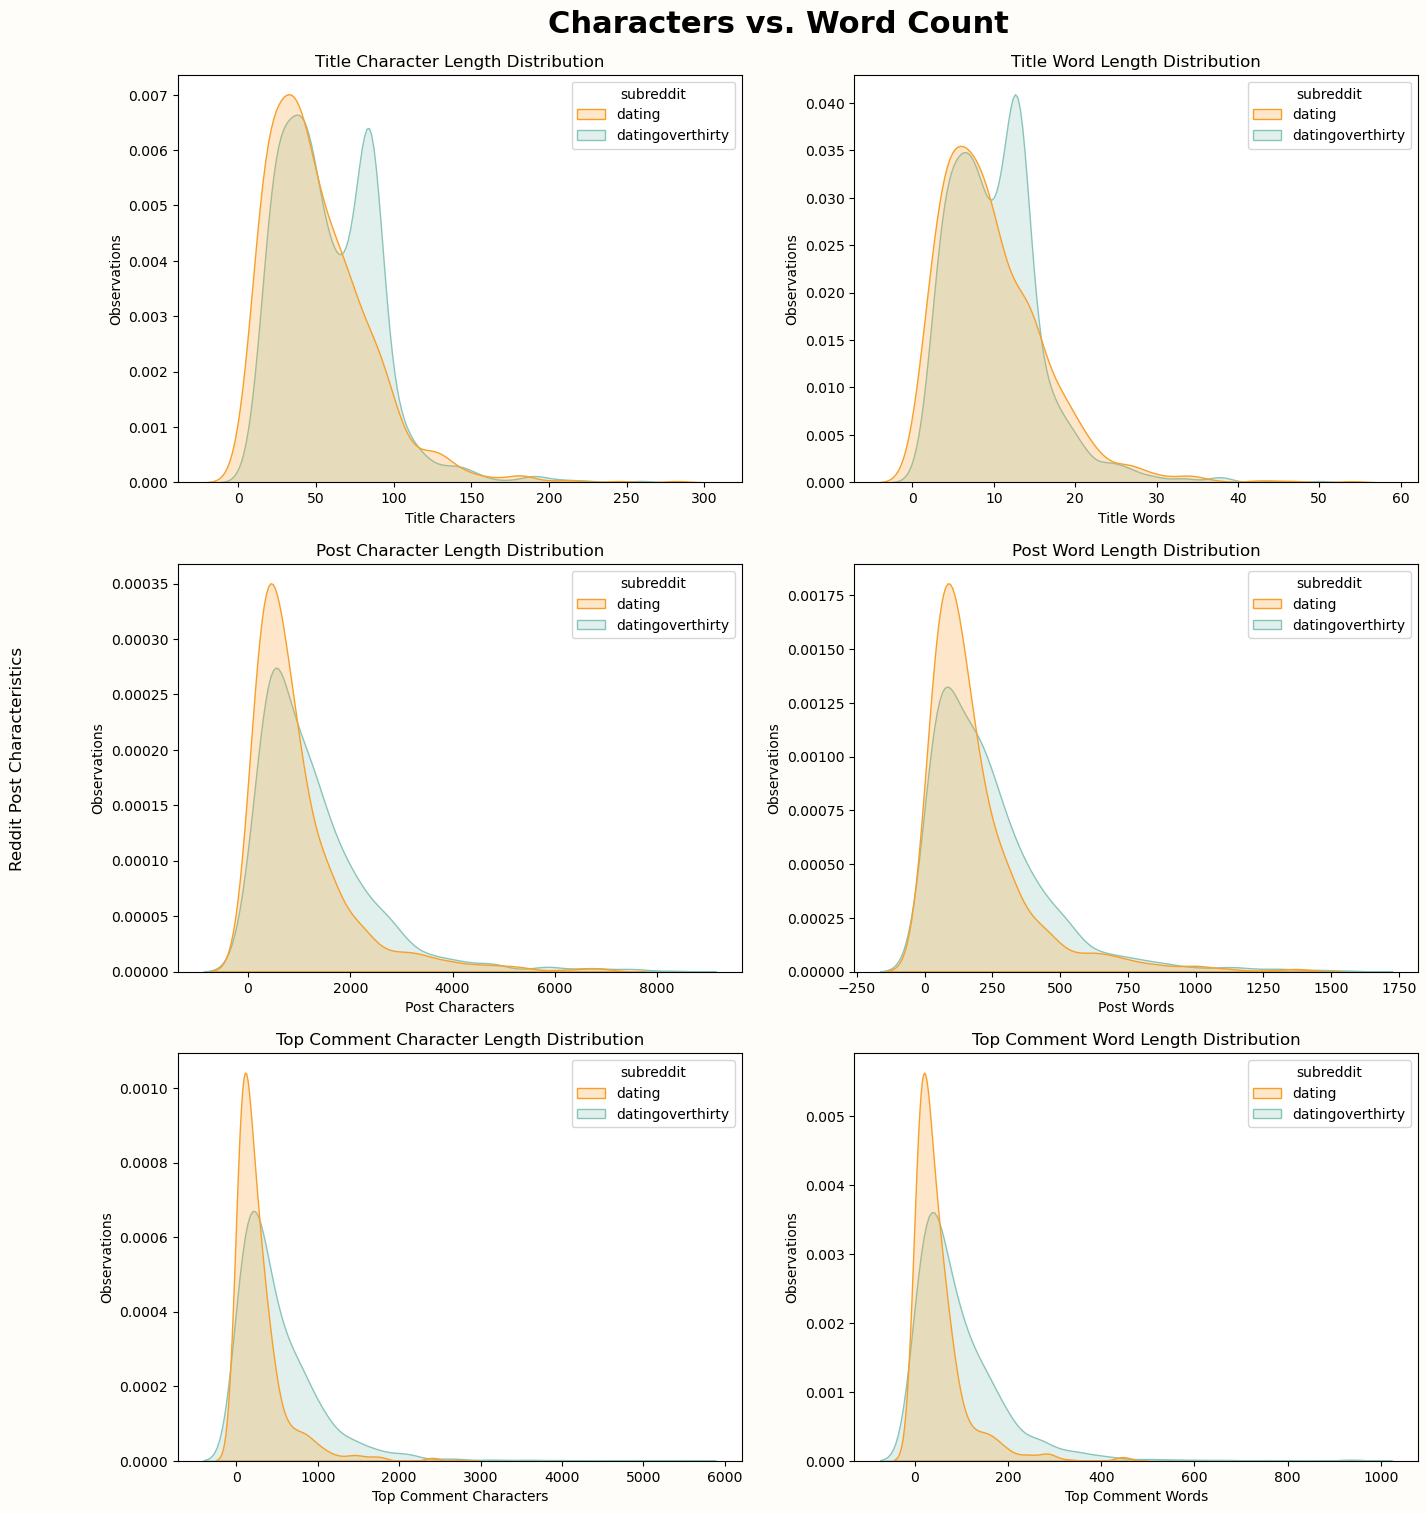

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(3,2, sharey=False, figsize = (16,18))
fig.bbox_inches='tight'
fig.supxlabel('Characters vs. Word Count', y = 0.90, size=22, fontweight='bold')
fig.supylabel('Reddit Post Characteristics')
fig.set_facecolor('#fffdf9')
fig.set_edgecolor('#89c4ba')

subreddit_colors = {'dating': '#f89f29', 'datingoverthirty' : '#89c4ba'}

#Title
sns.kdeplot(ax=ax1[0], data = df, x='title_characters', hue='subreddit', palette=title_char, fill=True)
ax1[0].set_title('Title Character Length Distribution')
ax1[0].set_xlabel('Title Characters')
ax1[0].set_ylabel('Observations')

sns.kdeplot(ax=ax1[1], data = df, x='title_words', hue='subreddit', palette=title_char, fill=True)
ax1[1].set_title('Title Word Length Distribution')
ax1[1].set_xlabel('Title Words')
ax1[1].set_ylabel('Observations')

#Selftext
subreddit_colors = {'dating': '#f89f29', 'datingoverthirty' : '#89c4ba'}
sns.kdeplot(ax=ax2[0], data = df, x='post_characters', hue='subreddit', palette=title_char, fill=True)
ax2[0].set_title('Post Character Length Distribution')
ax2[0].set_xlabel('Post Characters')
ax2[0].set_ylabel('Observations')

sns.kdeplot(ax=ax2[1], data = df, x='post_words', hue='subreddit', palette=title_char, fill=True)
ax2[1].set_title('Post Word Length Distribution')
ax2[1].set_xlabel('Post Words')
ax2[1].set_ylabel('Observations')

#Top Comment
subreddit_colors = {'dating': '#f89f29', 'datingoverthirty' : '#89c4ba'}
sns.kdeplot(ax=ax3[0], data = df, x='comment_characters', hue='subreddit', palette=title_char, fill=True, )
ax3[0].set_title('Top Comment Character Length Distribution')
ax3[0].set_xlabel('Top Comment Characters')
ax3[0].set_ylabel('Observations')

sns.kdeplot(ax=ax3[1], data = df, x='comment_words', hue='subreddit', palette=title_char, fill=True)
ax3[1].set_title('Top Comment Word Length Distribution')
ax3[1].set_xlabel('Top Comment Words')
ax3[1].set_ylabel('Observations')

plt.savefig(fname = 'images/character_and_word_count_all.png')
plt.show()

> Bimodal title length for _r/datingoverthirty_ some users are taking more time to post more details in their post titles.
> Selftext and top comment length tend to skew longer for _r/datingoverthirty_ than _r/dating_.  Perhaps better advice based on more details.

In [24]:
# Review Profiles
df[['subreddit', 'title', 'selftext',
       'top_comment_text', 'post_characters', 'post_words', 'title_characters',
       'title_words', 'comment_characters', 'comment_words']].nlargest(10,'title_characters')

,subreddit,title,selftext,top_comment_text,post_characters,post_words,title_characters,title_words,comment_characters,comment_words
53,dating,I (23f) have been wanting to start dating. I'v...,I've never been on a date before. I've wanted ...,Most guys wouldn't care. Some would consider i...,253,44,282,54,171.0,32.0
1713,datingoverthirty,Gfs sent me bumble photos of the guy I’d been ...,33F have been seeing 31 M for the last 5 month...,Time to move on,2218,433,259,50,15.0,4.0
780,dating,How to actually navigate a bar? I've been goin...,"Here's an example of what happened tonight, th...",I can clearly see your problem. You don't want...,3219,623,245,42,329.0,63.0
1647,datingoverthirty,Ever feel guilty for starting to feel like you...,Ended 5-6 months of what felt like it was not ...,I cried everyday for the first week of the bre...,988,193,224,44,983.0,184.0
721,dating,I am worried that a guy I am talking to isn't ...,"I f27, m34 have been talking we get along real...",How would you want him to tell you if the role...,202,39,217,47,129.0,24.0
1067,datingoverthirty,I matched with a woman who became very emotion...,I (37M) matched with a woman (44F) on Okcupid ...,You have a few options. If you want to be rid ...,4814,884,211,38,420.0,81.0
24,dating,"As a boy [18] I have always had heartbreaks, n...",I had always been an introvert my whole life b...,NaN,317,64,206,44,NaN,NaN
1412,datingoverthirty,I (34f) have been encountering a lot of younge...,"I'm a pretty kinky person behind closed doors,...","I know everyone has their thing, but if someon...",844,150,202,37,128.0,26.0
1585,datingoverthirty,How long would you stay away from dating apps ...,Broke up recently like three weeks ago and I’m...,I think a lot of people use the apps and datin...,1133,213,192,33,440.0,88.0
1732,datingoverthirty,We hung out a few times and then he left for a...,I met this guy and all our dates have been inc...,I'll just address one piece of your post - I d...,1062,220,190,38,623.0,110.0


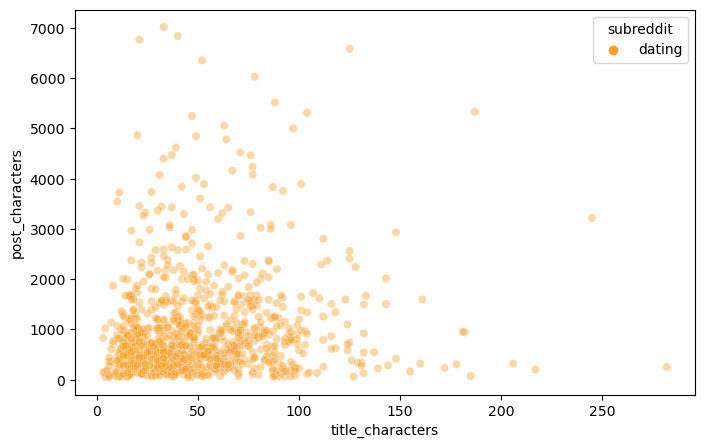

In [92]:
fig, ax = plt.figure(1,2, figsize=(8,5), sharex = True, sharey = True)
sns.scatterplot(ax = ax[0]data = df[df['subreddit']=='dating'], x='title_characters', y = 'post_characters', hue='subreddit', palette = subreddit_colors, alpha = 0.4)
sns.scatterplot(ax = ax[1, ]data = df[df['subreddit']=='dating'], x='title_characters', y = 'post_characters', hue='subreddit', palette = subreddit_colors, alpha = 0.4);

### Top Comments